# 卷积

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import util

lenna_path = '../resource/image/lenna.png'
lenna_color = cv2.imread('../resource/image/lenna.png', cv2.COLOR_BGR2RGB)
lenna_gray = cv2.cvtColor(lenna_color, cv2.COLOR_BGR2GRAY)

## 高斯模糊和锐化

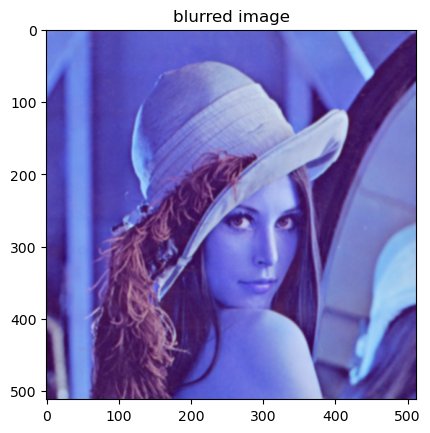

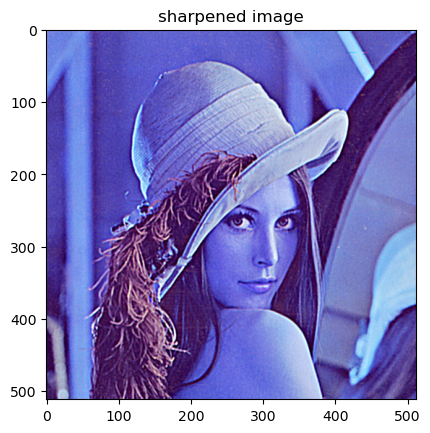

In [7]:
# 定义高斯滤波函数，用于模糊图像
def gaussian_blur(image, kernel_size):
    # 使用cv2.GaussianBlur函数，使用高斯滤波器，模糊图像
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)


# 定义锐化函数，用于锐化模糊的图像
def sharpen(image):
    # 定义锐化滤波器
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    # 使用cv2.filter2D函数，使用锐化滤波器，锐化模糊的图像
    return cv2.filter2D(image, -1, kernel)


lenna = cv2.imread('../resource/image/lenna.png')
# 使用高斯滤波函数，模糊图像
blurred = gaussian_blur(lenna, 5)
# 使用锐化函数，锐化模糊的图像
sharpened = sharpen(blurred)
# 将锐化后的图像保存
plt.figure()
plt.imshow(blurred), plt.title('blurred image')
plt.show()
plt.figure()
plt.imshow(sharpened), plt.title('sharpened image')
plt.show()

## soble边缘检测

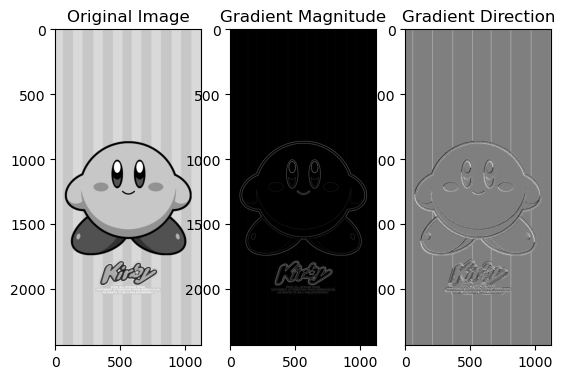

In [8]:
# 读取图像
kirby2 = cv2.imread('../resource/image/Kirby2.png', cv2.IMREAD_GRAYSCALE)

# 使用Sobel算子进行边缘检测
sobel_x = cv2.Sobel(kirby2, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(kirby2, cv2.CV_64F, 0, 1, ksize=3)

# 计算梯度幅值和方向
gradient_magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
gradient_direction = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)

# # CV方式显示结果
# cv2.imshow('Original Image', image)
# cv2.imshow('Gradient Magnitude', gradient_magnitude)
# cv2.imshow('Gradient Direction', gradient_direction)
# cv2.waitKey(0)

# matplotlib显示结果
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(kirby2, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.subplot(1, 3, 3)
plt.imshow(gradient_direction, cmap='gray')
plt.title('Gradient Direction')

plt.show()

## 中值滤波

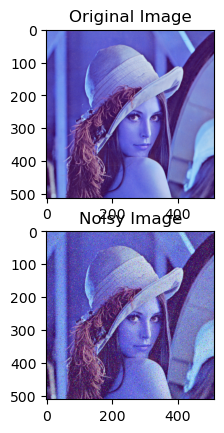

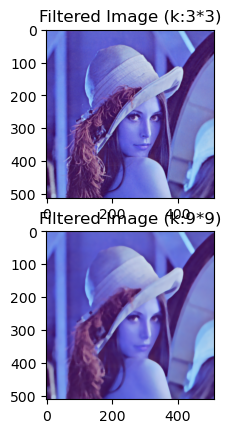

In [19]:
image = lenna_color

# 添加椒盐噪声
noisy_image = util.random_noise(image, mode='s&p')

# 进行中值滤波
filtered_image_3 = cv2.medianBlur(image, 3)
filtered_image_9 = cv2.medianBlur(image, 9)

# 显示原始图像和处理后的图像
plt.figure()
plt.subplot(221)
plt.imshow(image), plt.title('Original Image')
plt.subplot(222)
plt.imshow(noisy_image), plt.title('Noisy Image')
plt.show()

plt.figure()
plt.subplot(223)
plt.imshow(filtered_image_3), plt.title('Filtered Image (k:3*3)')
plt.subplot(224)
plt.imshow(filtered_image_9), plt.title('Filtered Image (k:9*9)')
plt.show()